# Assignment on EDA for Haberman's Survival Dataset

* 1. Age of patient at time of operation (numerical)
* 2. Patient's year of operation (year - 1900, numerical)
* 3. Number of positive axillary nodes detected (numerical)
* 4. Survival status (class attribute)
    * 1 = the patient survived 5 years or longer 
    * 2 = the patient died within 5 year

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_haberman = pd.read_csv('haberman.csv', names = ['age', 'op_year', 'axil_nodes_det', 'surv_status'])
df_haberman.shape
print(df_haberman.head())

   age  op_year  axil_nodes_det  surv_status
0   30       64               1            1
1   30       62               3            1
2   30       65               0            1
3   31       59               2            1
4   31       65               4            1


In [81]:
more_than_five_years = len(df_haberman[df_haberman['surv_status'] == 1])
less_than_five_years = len(df_haberman[df_haberman['surv_status'] == 2])

print('Patients survived 5 years or longer: {}'.format(more_than_five_years))
print('Patients survived less than 5 years: {}'.format(less_than_five_years))

Patients survived 5 years or longer: 225
Patients survived less than 5 years: 81


In [82]:
# Describe the dataset to get the gist of the fields present
df_haberman.describe()

,age,op_year,axil_nodes_det,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


/home/srinu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/srinu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/srinu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/srinu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


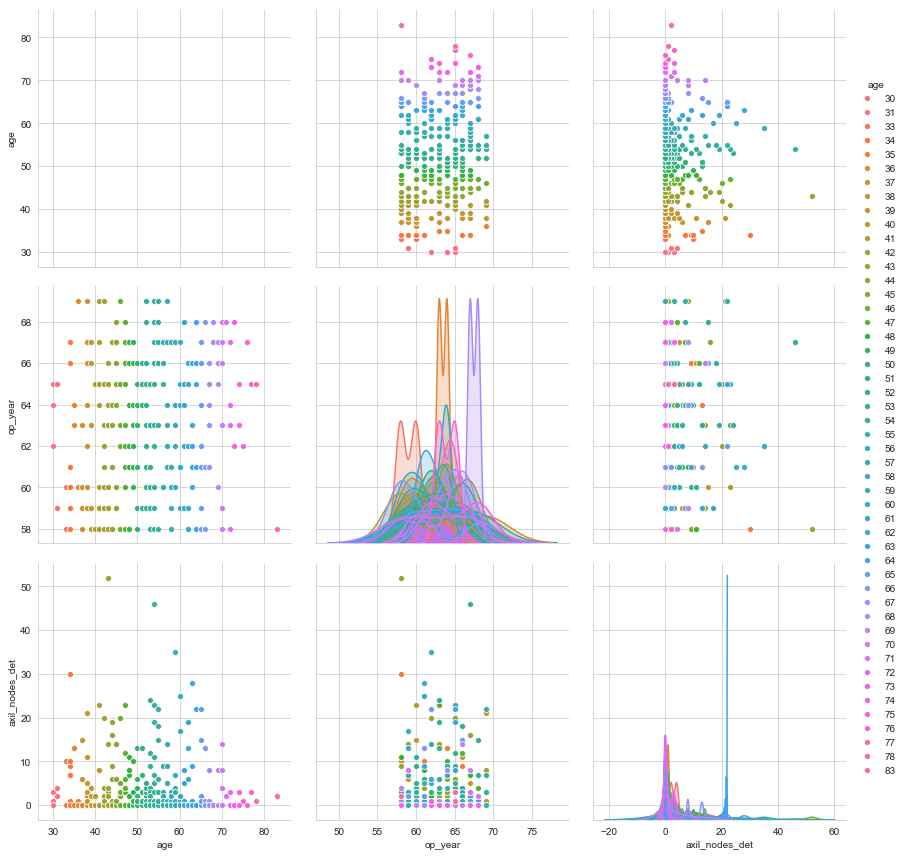

In [83]:
# Pair plots to observe which features in the dataset are useful
df_haberman_wo_surv_status = df_haberman[['age','op_year','axil_nodes_det']]
sns.set_style("whitegrid");
sns.pairplot(df_haberman_wo_surv_status, hue="age", kind='scatter', height=4);
plt.show()

# Observations:
 1. 'surv_status' and 'op_year' are the most distinguishable and useful fields in the Haberman's survival dataset
 2. The dataset is too ambiguous to draw more conclusions apart from these fields

# Univariate Analysis of different fields

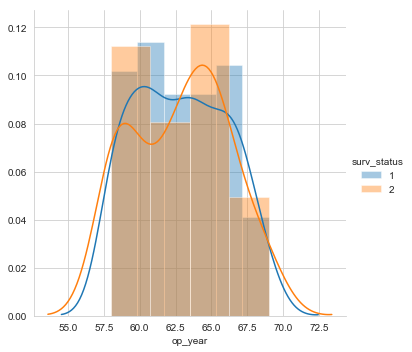

In [84]:
sns.FacetGrid(df_haberman, hue="surv_status", height = 5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.show();

# Observations
* There is a higher probability that the number of patients who survived 5 years or longer are operated between 1960 - 63 and low probability of surviving more than 5 years when operated between 1963 - 68.
* Howerver, the number of patients survived over the period of time for more than 5 years is significantly higher than that of the patients survived less than 5 years from the operated year.

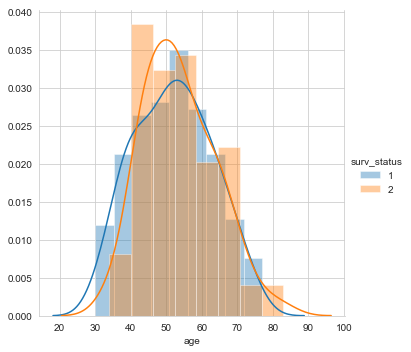

In [85]:
sns.FacetGrid(df_haberman, hue="surv_status", height = 5) \
   .map(sns.distplot,"age") \
   .add_legend();
plt.show();

# Observations
* The probability of survival of the patients for 5 or more years with the age ranging between 30 to 60 years is less than the probability of survival of the patients for less than 5 years between ages 30-62
* Post age 62 till the end, the probability of survival of patients less than or greated than 5 years is almost similar

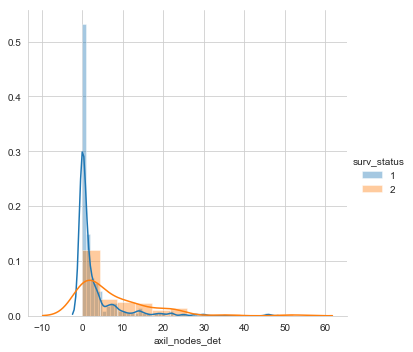

In [86]:
sns.FacetGrid(df_haberman, hue="surv_status", height = 5) \
   .map(sns.distplot, "axil_nodes_det") \
   .add_legend();
plt.show();

# Observations:
 1. Probability of survival of patients for more than 5 years is higher when the 'Axillary Node' count is between 0 to 8
 
 2. The dataset is too ambiguous and far too skewed to draw further palpable conclusions

pdf:  [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
bin_edges:  [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


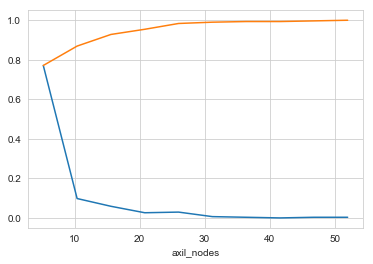

In [87]:
# Constructing CDF for the axil_nodes
counts, bin_edges = np.histogram(df_haberman['axil_nodes_det'], bins=10, density = False)

pdf = counts/sum(counts)
print("pdf: ", pdf)
print("bin_edges: ", bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('axil_nodes')
plt.show()

# Observations:
More than 80% of the patients have less than or equal to 10 Axillary Nodes

pdf:  [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
bin_edges:  [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


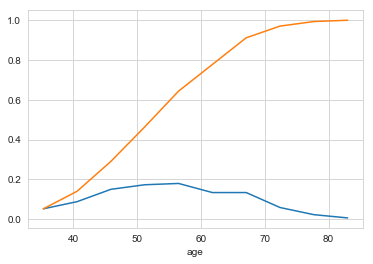

In [88]:
# Constructing CDF for the age
counts, bin_edges = np.histogram(df_haberman['age'], bins=10, density = False)

pdf = counts/sum(counts)
print("pdf: ", pdf)
print("bin_edges: ", bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age')
plt.show()

# Observations
80% of the patients are less than or equal to 63 years of age

pdf:  [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
bin_edges:  [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


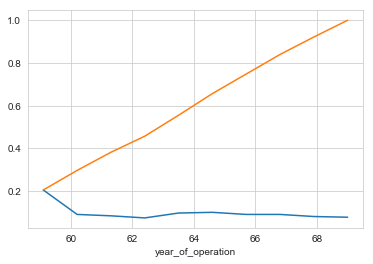

In [89]:
# Constructing CDF for the age
counts, bin_edges = np.histogram(df_haberman['op_year'], bins=10, density = False)

pdf = counts/sum(counts)
print("pdf: ", pdf)
print("bin_edges: ", bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('year_of_operation')
plt.show()

# Observations:
More than 80% of the patients have less than or equal to 10 Axillary Nodes

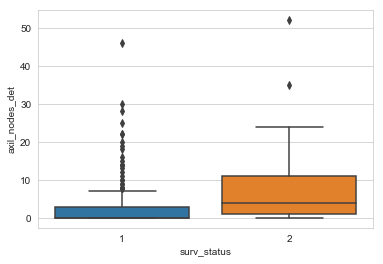

In [90]:
#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='surv_status',y='axil_nodes_det', data=df_haberman)
plt.show()

# Observation
    * The 50th percentile number of Axillary Nodes in patients with survival rate less than 5 years is slightly higher than that of the patients with survial rate of 5 or more years

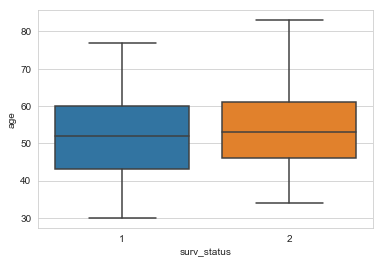

In [91]:
#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='surv_status',y='age', data=df_haberman)
plt.show()

# Observation
    * The 75th percentile of Age in patients with survival rate less than 5 years is slightly higher than that of the patients with survial rate of 5 or more years. This is the case for the other 2 lower quartiles too. However the number of patients survived more than 5 years is higher than that of the patients who survived less than 5 years.

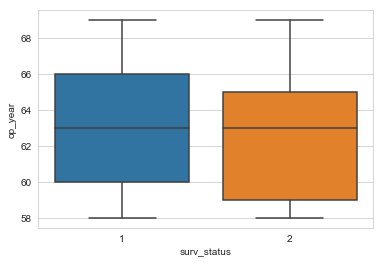

In [92]:
#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='surv_status',y='op_year', data=df_haberman)
plt.show()

# Observation
    * The 75th percentile of Operated Year in patients with survival rate 5 or more than 5 years is slightly higher than that of the patients with survial rate of less than 5 years. This is the case for 25th quartile. The 50th quartile is equal to both the survival statuses. However the number of patients survived more than 5 years is higher than that of the patients who survived less than 5 years.

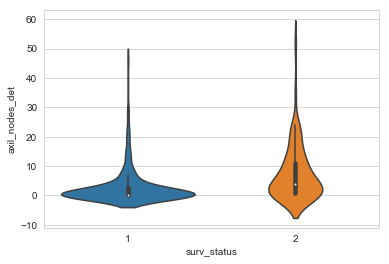

In [93]:
sns.violinplot(x="surv_status", y="axil_nodes_det", data=df_haberman, size=8)
plt.show()

# Observations
* The number of Axillary nodes for the patients survied 5 or more years is in range 0 to 5. The spread is very high in this region than the survival status of patients with less than 5 years

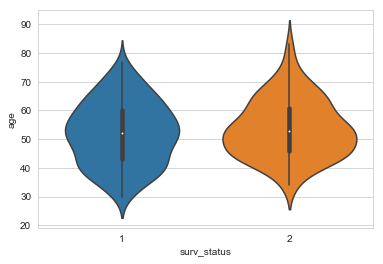

In [94]:
sns.violinplot(x="surv_status", y="age", data=df_haberman, size=8)
plt.show()

# Observations
* The probability range of the maximum survival of patients is signficantly higher and consistent over the time and thus the number of patients survived 5 or more years is higher than the number of patients survived less than 5 years for Age. Although at aroud the age 50 the peak is more higher than for survival less than 5 years.

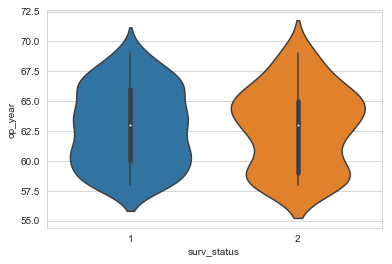

In [95]:
sns.violinplot(x="surv_status", y="op_year", data=df_haberman, size=8)
plt.show()

# Observations
* The probability of range of the maximum survival of patients is signficantly higher and consistent over the time and thus the number of patients survived 5 or more years is slightly higher than the number of patients survived less than 5 years for Operated year. Although at aroud the Operated year 63 the peak is more higher for survival less than 5 years than the survival for 5 or more years.

# Overall conclusions for the EDA for Haberman Dataset
* The dataset is slightly skewed and there has been more number of patients survived 5 or more years(225) and less number of patients who survived less than 5 years from the operating year
* In the Univariate Analysis, patients who survived less than 5 years surpassed the patients who survived 5 or more years at 2 instances(for Age and Opearated Year plots) but the overall the number of patients who survived 5 or more years is consistent and much higher.
* The highest number of patients who survived 5 years or longer are operated between 1960 - 62